# Transfer Learning - Comparative Image Classification

### Gerekli kütüphaneleri yükleme

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as vgg_preprocess, decode_predictions as vgg_decode
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input as effnet_preprocess, decode_predictions as effnet_decode
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as mobilenet_preprocess, decode_predictions as mobilenet_decode


### Resim yükleme ve ön işleme işlemleri için yardımcı fonksiyon

In [28]:
def load_and_preprocess_image(file_path, model_preprocess, target_size=(224, 224)):
    img = Image.open(file_path).resize(target_size)
    img = np.array(img)
    img = img.reshape(-1, *target_size, 3)
    img = model_preprocess(img)
    return img

### Model tahmini ve sonuçları çözme işlemleri için yardımcı fonksiyon

In [29]:
def predict_and_decode(model, preprocess_func, decode_func, image_path, target_size=(224, 224), top_k=5):
    img = load_and_preprocess_image(image_path, preprocess_func, target_size)
    preds = model.predict(img)
    decoded_preds = decode_func(preds, top=top_k)[0]
    return decoded_preds

### Modelleri Yükleme

In [30]:
vgg_model = VGG16(weights='imagenet', include_top=True)
effnet_model = EfficientNetB0(weights='imagenet', include_top=True)
mobilenet_model = MobileNetV2(weights='imagenet', include_top=True)


### Görüntü Yolları

In [31]:
image_paths = ["sports_car.jpg", "speedboat.jpg", "parachute.jpg"]


### Doğruluk Oranları için Boş Listeler

In [32]:
vgg_accuracies = []
effnet_accuracies = []
mobilenet_accuracies = []

### Her bir resim için tahminler yapma

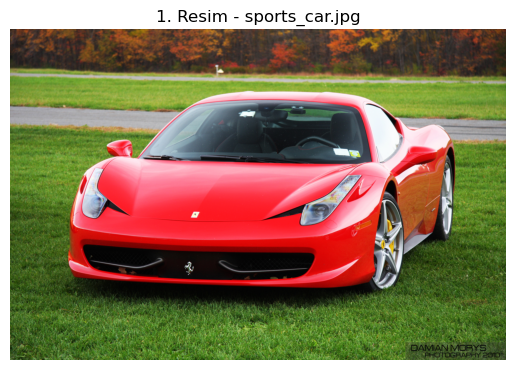

1/1 [==============================] - 0s 468ms/step
1. Resim Tahminleri:

VGG16:

1: sports_car (0.87)
2: convertible (0.09)
3: racer (0.02)
4: grille (0.01)
5: pickup (0.01)


1/1 [==============================] - 2s 2s/step
EfficientNetB0:

1: sports_car (0.88)
2: racer (0.02)
3: convertible (0.01)
4: car_wheel (0.01)
5: grille (0.00)


1/1 [==============================] - 1s 1s/step
MobileNetV2:

1: sports_car (0.99)
2: car_wheel (0.00)
3: racer (0.00)
4: convertible (0.00)
5: grille (0.00)




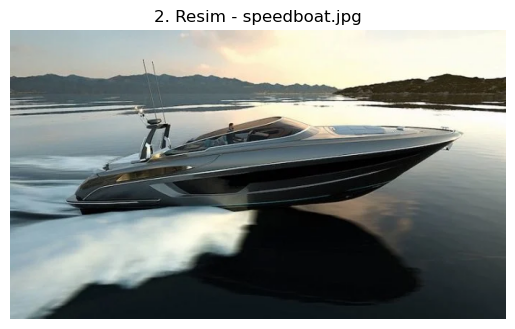

1/1 [==============================] - 0s 266ms/step
2. Resim Tahminleri:

VGG16:

1: speedboat (0.92)
2: trimaran (0.05)
3: catamaran (0.01)
4: amphibian (0.00)
5: convertible (0.00)


1/1 [==============================] - 0s 78ms/step
EfficientNetB0:

1: speedboat (0.90)
2: trimaran (0.01)
3: catamaran (0.01)
4: lakeside (0.00)
5: sandbar (0.00)


1/1 [==============================] - 0s 59ms/step
MobileNetV2:

1: speedboat (0.95)
2: catamaran (0.01)
3: dock (0.01)
4: trimaran (0.01)
5: amphibian (0.00)




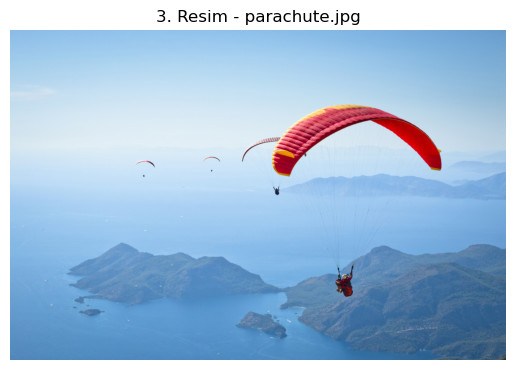

1/1 [==============================] - 0s 334ms/step
3. Resim Tahminleri:

VGG16:

1: parachute (1.00)
2: alp (0.00)
3: balloon (0.00)
4: mountain_tent (0.00)
5: umbrella (0.00)


1/1 [==============================] - 0s 84ms/step
EfficientNetB0:

1: parachute (0.96)
2: alp (0.00)
3: balloon (0.00)
4: ibex (0.00)
5: volcano (0.00)


1/1 [==============================] - 0s 68ms/step
MobileNetV2:

1: parachute (0.93)
2: balloon (0.00)
3: seashore (0.00)
4: flagpole (0.00)
5: lakeside (0.00)




In [33]:
for i, image_path in enumerate(image_paths):
    # Resmi gösterme
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{i + 1}. Resim - {image_path}')
    plt.show()

    # VGG16 tahminleri
    vgg_preds = predict_and_decode(vgg_model, vgg_preprocess, vgg_decode, image_path)
    print(f"{i + 1}. Resim Tahminleri:\n")
    print("VGG16:\n")
    for j, (imagenet_id, label, score) in enumerate(vgg_preds):
        print(f"{j + 1}: {label} ({score:.2f})")
    print("\n")
    vgg_accuracies.append(vgg_preds[0][2])  # İlk tahminin doğruluk oranını ekleme

    # EfficientNetB0 tahminleri
    effnet_preds = predict_and_decode(effnet_model, effnet_preprocess, effnet_decode, image_path)
    print("EfficientNetB0:\n")
    for j, (imagenet_id, label, score) in enumerate(effnet_preds):
        print(f"{j + 1}: {label} ({score:.2f})")
    print("\n")
    effnet_accuracies.append(effnet_preds[0][2])  # İlk tahminin doğruluk oranını ekleme

    # MobileNetV2 tahminleri
    mobilenet_preds = predict_and_decode(mobilenet_model, mobilenet_preprocess, mobilenet_decode, image_path)
    print("MobileNetV2:\n")
    for j, (imagenet_id, label, score) in enumerate(mobilenet_preds):
        print(f"{j + 1}: {label} ({score:.2f})")
    print("\n")
    mobilenet_accuracies.append(mobilenet_preds[0][2])  # İlk tahminin doğruluk oranını ekleme

### Doğruluk performanslarını görselleştirme

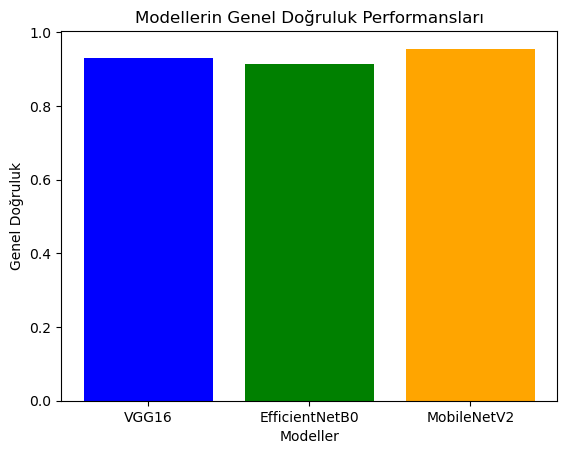

In [34]:
models = ['VGG16', 'EfficientNetB0', 'MobileNetV2']
avg_accuracies = [np.mean(vgg_accuracies), np.mean(effnet_accuracies), np.mean(mobilenet_accuracies)]

plt.bar(models, avg_accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Modeller')
plt.ylabel('Genel Doğruluk')
plt.title('Modellerin Genel Doğruluk Performansları')
plt.show()


### Doğruluk oranlarını yazdırma

In [35]:
for i, model in enumerate(models):
    print(f"{model} Genel Doğruluk: {avg_accuracies[i]:.2f}")

VGG16 Genel Doğruluk: 0.93
EfficientNetB0 Genel Doğruluk: 0.92
MobileNetV2 Genel Doğruluk: 0.96
